In [19]:
import glob
import os
import nltk
import pickle
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.mlab as mlab
import scipy
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import pylab as pl
pd.options.display.max_rows = 999

count    151.000000
mean       1.251656
std        1.014682
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Uniq_Length, dtype: float64


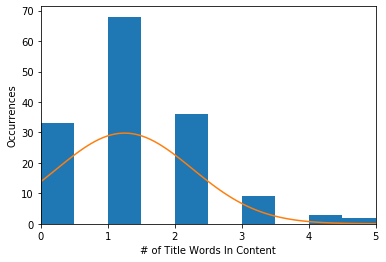

Null Hypothesis: Mean number of words present in the title/podcast is = 1
Alternate Hypothesis: Mean number of words in the title/podcast is > 1
z-statistic, p-vlaue:  (3.047649039099344, 0.0011531956126961175)
p-value < 0.05 reject null hypothesis
PCC Value:  0.9026808089079404


,ID,Date,topicName,scrubbedtext,Name,uniq,Uniq_Length,Title_Length
0,1012570406,September112019,SideEffectsOfMoney.txt,"[I, stack, hundreds, roof, stop, I, reach, fam...","[The, M, F, C, E, O, Project]",[Project],1,7
1,1028908750,September162019,SideEffectsOfMoney.txt,"[NPR, This, hidden, brain, I, 'm, Shankar, ved...","[Hidden, Brain]","[Hidden, Brain]",2,2
2,1042368254,September142019,SideEffectsOfMoney.txt,"[said, Starbucks, Nitro, cold, copy, music, wo...","[The, Herdwith, Colin, Cowherd]",[],0,4
3,1047335260,September132019,SideEffectsOfMoney.txt,"[fight, night, Joe, Biden, mumbles, Bernie, bu...","[The, Ben, Shapiro, Show]",[Show],1,4
4,1051557000,August082019,SideEffectsOfMoney.txt,"[What, episode, Seinfeld, brought, Starbucks, ...","[Science, Vs]","[Science, Vs]",2,2
5,1057255460,September132019,SideEffectsOfMoney.txt,"[exciting, news, start, show, live, taping, po...","[The, N, P, R, Politics, Podcast]","[R, Politics, Podcast]",3,6
6,1062418176,September112019,SideEffectsOfMoney.txt,"[welcome, true, crime, garage, wherever, whate...","[T, R, U, E, C, R, I, M, E, G, A, R, A, G, E]",[],0,15
7,1068563276,September112019,SideEffectsOfMoney.txt,"[know, one, four, people, avoid, smiling, cond...","[Getting, Curiouswith, Jonathan, Van, Ness]",[Getting],1,5
8,1070322219,September112019,SideEffectsOfMoney.txt,"[Jocko, podcast, number, 194, Echo, Charles, J...","[Jocko, Podcast]",[Podcast],1,2
9,1081124929,September162019,SideEffectsOfMoney.txt,"[I, 'm, fan, vanished, podcast, sometimes, I, ...","[The, Vanished, Podcast]","[Vanished, Podcast]",2,3


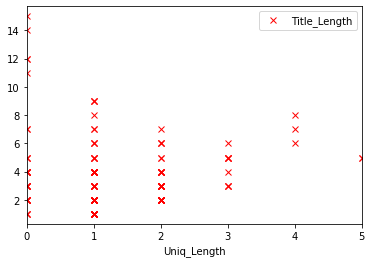

In [29]:
#Expand to include subtitle.
#Find a way to calculate the mean automatically.
#Compare the words in the title against the top keywords.
#Address acronymns, they throw off title tokenization leading to poor results.

results = []
for folderName,subfolders,fileName in os.walk('C:\\Users\\Chris\\Desktop\\Podknow-master (1)\\Podknow-master\\data\\transcripts\\gcsst\\scrubbed'):
    for file in fileName:
        if  str(file.endswith(".txt_scrubbed")):
            f = open(os.path.join(folderName,file),'rb')
            data = pickle.load(f)
            value0, value1, value2, *extraWords = file.split('_')
            value4 = data
            rows = (value0,value1,value2,value3,value4)
            results.append(rows)
            
            
labels = ['ID','Name','Date','topicName','scrubbedtext']
PodKnow_Data = pd.DataFrame.from_records(results, columns = labels)

# name_array = PodKnow_Data.loc[:, 'topicName']
# data_array = PodKnow_Data.loc[: , 'scrubbedtext']

name_array = PodKnow_Data['Name'].values.tolist()

# Put the name_array back into pandas and replace 'Name' column with the name_array data ***Done***
# Compare the columns and see if name_array values exist in 'scrubbedtext column'

for i, item in enumerate(name_array):
    #print (name_array)
    name_array[i] = re.findall('[a-zA-Z][^A-Z]*', name_array[i])
    
n = PodKnow_Data.columns[1]

PodKnow_Data.drop(n, axis = 1, inplace = True)

PodKnow_Data[n] = name_array

#If unique is an empty list then there is no mention of the title in the podcast.
PodKnow_Data['uniq'] = PodKnow_Data.apply(lambda x: [i for i in x['Name'] if i.lower() in x['scrubbedtext']], axis = 1)

PodKnow_Data['Uniq_Length'] = PodKnow_Data['uniq'].str.len()
PodKnow_Data['Title_Length'] = PodKnow_Data['Name'].str.len()

PodKnow_Data_Title = PodKnow_Data['Title_Length'].astype(float)
PodKnow_Data_Title_List = PodKnow_Data_Title.values.tolist()

#Statistics for top 151 podcasts.
#sort_uniq_length = PodKnow_Data.sort_values(by=['Uniq_Length'])
print(PodKnow_Data['Uniq_Length'].describe())

#Graph the data from the Uniq Length column
PodKnow_Data_Uniq = PodKnow_Data['Uniq_Length'].astype(float)
PodKnow_Data_List = PodKnow_Data_Uniq.values.tolist()

#Fitting Normal Distribution
plt.figure(1)
result = plt.hist(PodKnow_Data_List)
plt.xlim((min(PodKnow_Data_List), max(PodKnow_Data_List)))

mean = np.mean(PodKnow_Data_List)
variance = np.var(PodKnow_Data_List)
sigma = np.sqrt(variance)
x = np.linspace(min(PodKnow_Data_List), max(PodKnow_Data_List), 100)
dx = result[1][1] - result[1][0]
scale = len(PodKnow_Data_List)*dx
plt.plot(x, scipy.stats.norm.pdf(x, mean, sigma)*scale)
plt.xlabel("# of Title Words In Content")
plt.ylabel("Occurrences")
plt.show()


#Hypothesis Testing
print("Null Hypothesis: Mean number of words present in the title/podcast is = 1")
print("Alternate Hypothesis: Mean number of words in the title/podcast is > 1")
#One Population Mean z test
print("z-statistic, p-vlaue: ", sm.stats.ztest(PodKnow_Data_List, value = 1, alternative = "larger"))
print("p-value < 0.05 reject null hypothesis")
#Strong evidence to support the alternative hypothesis. 

# Correlation/ Covariance 
# Pearson Correlation Coefficient
# Checking to see if there is a linear correlation between length of title and words found in Title and Uniq words found in content.

data1 = PodKnow_Data_Title_List
data2 = PodKnow_Data_List
corr, p = pearsonr(data1, data2)

print("PCC Value: ", p)
# Based on this value being almost 1 we can state that there is a positive linear correlation between length of title and uniq words found in podcast content

#Plotting length of title vs uniq word length.
PodKnow_Data.plot(x = 'Uniq_Length', y = 'Title_Length', style = 'rx')

PodKnow_Data
